In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

import gym
from environment import GridEnv
from actor_critic_cnn import A2C_CNN
from actor_cnn import Actor_CNN
from critic_cnn import Critic_CNN

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

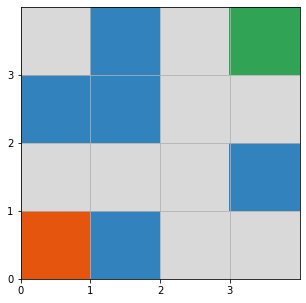

In [3]:
env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=100,
    img_state=True,
    greyscale=True,
    img_size=(64, 64),
)

In [4]:
a = env.reset()
shape = a[1].shape
shape

(1, 64, 64)

In [5]:
# env = gym.make('procgen:procgen-coinrun-v0')
# shape = env.reset().shape
# shape

In [6]:
actor_cnn_model = Actor_CNN(
    img_dim=1 if env.greyscale else 3,
    w=shape[1],
    h=shape[2],
    action_dim=env.action_space.n)
critic_cnn_model = Critic_CNN(
    img_dim=1 if env.greyscale else 3,
    w=shape[1],
    h=shape[2])
a2c = A2C_CNN(
    env=env, 
    actor=actor_cnn_model,
    critic=critic_cnn_model,
    n_actns=4,
    actor_optmz=torch.optim.Adam(actor_cnn_model.parameters(), lr=0.001),
    critic_optmz=torch.optim.Adam(critic_cnn_model.parameters(), lr=0.001),
    hyprprms={
        'gamma': 0.995,
    },
    log_freq=500,
)


In [7]:
a2c.run(3000)

Episode: 0, Loss: 0.9564725160598755, Avg. Reward: -90.39999999999998


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:76] data. DefaultCPUAllocator: not enough memory: you tried to allocate 5537792 bytes.

In [ ]:
env.action_space